# Receiver Operating Characteristic Curve Analysis

index : The unique ID of each observation.

class : The true class of each observation. The classes are binary (0 or 1).

predicted_prob : The model's estimate of probability that the observation belongs to class 1.

In [1]:
import pandas as pd
df = pd.read_csv('model_outcome.csv')

In [2]:
df.head(10)

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118
5,6,0,0.566989
6,7,1,0.878196
7,8,1,0.716780
8,9,0,0.891356
9,10,0,0.899982


### Manually calculate the sensitivity and specificity of the model, using a predicted_prob threshold of greater than or equal to .5.

In [3]:
# Set prediction threshold to greater than or equal to 0.5
df['prediction'] = df.predicted_prob.apply(lambda x : 1 if x>= 0.5 else 0)

In [4]:
df.head(10)

,index,class,predicted_prob,prediction
0,1,0,0.592837,1
1,2,1,0.624829,1
2,3,0,0.073848,0
3,4,1,0.544891,1
4,5,0,0.015118,0
5,6,0,0.566989,1
6,7,1,0.878196,1
7,8,1,0.716780,1
8,9,0,0.891356,1
9,10,0,0.899982,1


In [5]:
# Create a function where the conditionals determine the value of the outcome 
def classify(df):
    if (df['prediction'] == 1) & (df['prediction'] == df['class']):
        val = 'TP'
    elif (df['prediction'] == 1) & (df['prediction'] != df['class']):
        val = 'FP'
    elif (df['prediction'] == 0) & (df['prediction'] == df['class']):
        val = 'TN'
    else:
        val = 'FN'
    return val

In [6]:
# Create column that contains the values of outcome 
df['outcome'] = df.apply(classify , axis=1)

In [7]:
df.head()

,index,class,predicted_prob,prediction,outcome
0,1,0,0.592837,1,FP
1,2,1,0.624829,1,TP
2,3,0,0.073848,0,TN
3,4,1,0.544891,1,TP
4,5,0,0.015118,0,TN


In [8]:
# Count Frequency of each outcome in 'outcome' column to calculate Sensitivity, Specificity
TP = (df['outcome'] == 'TP').sum() 
TN = (df['outcome'] == 'TN').sum()
FP = (df['outcome'] == 'FP').sum()
FN = (df['outcome'] == 'FN').sum()

In [9]:
# Sensitivity and Specificity Formula
Sensitivity = TP / (TP + FN)
Specificity = TN / (FP + TN)

In [10]:
print(Sensitivity, Specificity)

0.8170731707317073 0.7578740157480315


### Manually calculate the Area Under the Receiver Operating Characteristic Curve.

In order to calculate the ROC curve, we need to find the True Positive Rate and False Positive Rate at different levels of threshold.

I used threshold increments of 0.1 from 0 to 1. 

In [11]:
# Store TPR and FPR values
TPR_list = []
FPR_list = [] 

In [12]:
#Create function where conditional determines the values of the outcome 
def classify(df,prediction_column,class_column):
    classify_list = []
    for row in range(len(df)):
        if (df.loc[row,prediction_column] == 1) & (df.loc[row,prediction_column] == df.loc[row,class_column]):
            classify_list.append('TP')
        elif (df.loc[row,prediction_column] == 1) & (df.loc[row,prediction_column] != df.loc[row,class_column]):
            classify_list.append('FP')
        elif (df.loc[row,prediction_column] == 0) & (df.loc[row,prediction_column] == df.loc[row,class_column]):
            classify_list.append('TN')
        else:
            classify_list.append('FN')
    return classify_list 

In [13]:
def create_threshold_columns(df):
    for i in range(1,11):
        # Set threshold increment to 0.1
        threshold_i = i/10 
        
        # Create 'prediction_threshold_i' columns
        prediction = 'prediction_threshold_' + str(threshold_i)
        
        # Create 'outcome_threshold_i' column
        outcome = 'outcome_threshold' + str(threshold_i)
        
        # Store value 1 if x> threshold else 0 into each row of prediction_threshold_i column
        df[prediction] = df.predicted_prob.apply(lambda x: 1 if x > threshold_i else 0)
        
        # Create column that contains the values of outcome 
        df[outcome] = classify(df,prediction,'class')
        
        # Count Frequency of each outcome in 'outcome_threshold_i' column to calculate FPR, TPR 
        TP = (df[outcome] == 'TP').sum() 
        TN = (df[outcome] == 'TN').sum()
        FP = (df[outcome] == 'FP').sum()
        FN = (df[outcome] == 'FN').sum()
        
        # FPR and TPR formula 
        FPR = FP/(FP + TN)
        TPR = TP/(TP +FN)
        
        #Store calculated values into list
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    
    return TPR_list, FPR_list

In [18]:
df.head(20)

,index,class,predicted_prob,prediction,outcome,prediction_threshold_0.1,outcome_threshold0.1,prediction_threshold_0.2,outcome_threshold0.2,prediction_threshold_0.3,...,prediction_threshold_0.6,outcome_threshold0.6,prediction_threshold_0.7,outcome_threshold0.7,prediction_threshold_0.8,outcome_threshold0.8,prediction_threshold_0.9,outcome_threshold0.9,prediction_threshold_1.0,outcome_threshold1.0
0,1,0,0.592837,1,FP,1,FP,1,FP,1,...,0,TN,0,TN,0,TN,0,TN,0,TN
1,2,1,0.624829,1,TP,1,TP,1,TP,1,...,1,TP,0,FN,0,FN,0,FN,0,FN
2,3,0,0.073848,0,TN,0,TN,0,TN,0,...,0,TN,0,TN,0,TN,0,TN,0,TN
3,4,1,0.544891,1,TP,1,TP,1,TP,1,...,0,FN,0,FN,0,FN,0,FN,0,FN
4,5,0,0.015118,0,TN,0,TN,0,TN,0,...,0,TN,0,TN,0,TN,0,TN,0,TN
5,6,0,0.566989,1,FP,1,FP,1,FP,1,...,0,TN,0,TN,0,TN,0,TN,0,TN
6,7,1,0.878196,1,TP,1,TP,1,TP,1,...,1,TP,1,TP,1,TP,0,FN,0,FN
7,8,1,0.716780,1,TP,1,TP,1,TP,1,...,1,TP,1,TP,0,FN,0,FN,0,FN
8,9,0,0.891356,1,FP,1,FP,1,FP,1,...,1,FP,1,FP,1,FP,0,TN,0,TN
9,10,0,0.899982,1,FP,1,FP,1,FP,1,...,1,FP,1,FP,1,FP,0,TN,0,TN


In [14]:
create_threshold_columns(df)

([0.9939024390243902,
  0.9878048780487805,
  0.9776422764227642,
  0.967479674796748,
  0.8170731707317073,
  0.6666666666666666,
  0.48577235772357724,
  0.34552845528455284,
  0.15040650406504066,
  0.0],
 [0.8543307086614174,
  0.7066929133858267,
  0.5531496062992126,
  0.3937007874015748,
  0.2421259842519685,
  0.045275590551181105,
  0.03937007874015748,
  0.02952755905511811,
  0.015748031496062992,
  0.0])

### Visualize the Receiver Operating Characterstic Curve.

Plotted ROC Curve where False Positive Rate is the X-axis and True Positive Rate is the Y-axis.

Drew a line with slope 1 to represent pure guessing. 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

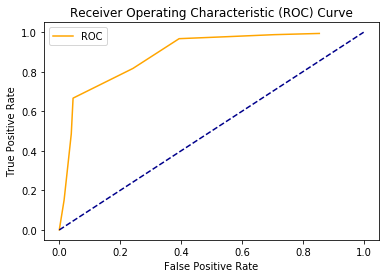

In [17]:
plot_roc_curve(FPR_list, TPR_list)